# Nivell 1
#### Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es).

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
from PIL import Image

Vamos a extraer la tabla con la agenda diaria que se muestra en la home de la web:

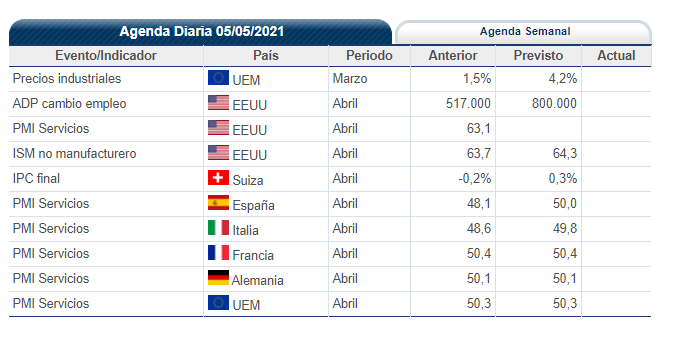

In [29]:
Image.open('image.png')

Incorporamos la fecha para tener un histórico y almacenar los datos en un csv

In [2]:
url="https://www.bolsamadrid.es/esp/aspx/Portada/Portada.aspx"
html=requests.get(url)

In [3]:
soup = BeautifulSoup(html.content, 'html.parser')

Extraemos la fecha

In [4]:
import re
tabla1=soup.find_all('table', id="TblIndPort")
titulo=tabla1[0].find('a').text
fecha=re.findall('\d*/\d*/\d*',titulo)[0]
fecha

'07/05/2021'

La tabla con los datos tiene la clase TblPort TblIndPort

In [5]:
results=soup.find_all('table',class_='TblPort TblIndPort')

In [6]:
#Buscamos la etiqueta tr que indica las filas
tabla2=[i.find_all('tr') for i in results][0]
tabla2

[<tr>
 <th>Evento/Indicador</th>
 <th>País</th>
 <th>Periodo</th>
 <th>Anterior</th>
 <th>Previsto</th>
 <th>Actual</th>
 </tr>,
 <tr><td>PMI Servicios</td><td><img border="0" src="/images/banderas/Japon.gif"/> Japón</td><td>Abril</td><td align="right">48,3                </td><td align="right"> </td><td align="right" class="Ult">49,5                </td></tr>,
 <tr><td>PMI Servicios</td><td><img border="0" src="/images/banderas/China.gif"/> China</td><td>Abril</td><td align="right">54,3                </td><td align="right"> </td><td align="right" class="Ult">56,3                </td></tr>,
 <tr><td>Tasa de desempleo</td><td><img border="0" src="/images/banderas/Suiza.gif"/> Suiza</td><td>Abril</td><td align="right">3,3%                </td><td align="right">3,3%                </td><td align="right" class="Ult">3,1%                </td></tr>,
 <tr><td>Producción Industrial</td><td><img border="0" src="/images/banderas/Alemania.gif"/> Alemania</td><td>Marzo</td><td align="right">-6,67

In [7]:
#Guardamos el nombre de las columnas buscando la etiqueta th
columns=[i.text for i in tabla2[0].find_all('th')]
columns

['Evento/Indicador', 'País', 'Periodo', 'Anterior', 'Previsto', 'Actual']

In [8]:
#Creamos un dataframe con las columnas anteriores y vamos guardando cada fila, etiqueta td, en el dataframe
df=pd.DataFrame(columns=columns)
for i in tabla2[1:]:
    fila=([j.text for j in i.find_all('td')])
    fila = pd.Series(fila, index=df.columns)
    df = df.append(fila, ignore_index=True)
#Añadimos fecha
df['Fecha']=fecha
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df=df[cols]
df

,Fecha,Evento/Indicador,País,Periodo,Anterior,Previsto,Actual
0,07/05/2021,PMI Servicios,Japón,Abril,"48,3",,"49,5"
1,07/05/2021,PMI Servicios,China,Abril,"54,3",,"56,3"
2,07/05/2021,Tasa de desempleo,Suiza,Abril,"3,3%","3,3%","3,1%"
3,07/05/2021,Producción Industrial,Alemania,Marzo,"-6,67% (r)",,"4,87%"
4,07/05/2021,Balanza comercial,Alemania,Marzo,18.900M,19.500M,14.300M
5,07/05/2021,Balanza cuenta corriente,Alemania,Marzo,18.800M,,30.200M
6,07/05/2021,Balanza cuenta corriente,Francia,Marzo,-6.858M,,-5.230M
7,07/05/2021,Producción Industrial,Francia,Marzo,"-4,8% (r)","2,0%","0,8%"
8,07/05/2021,Balanza comercial,Francia,Marzo,-5.140M (r),,-6.070M
9,07/05/2021,Producción Industrial,España,Marzo,"-2,3% (r)","12,1%","12,4%"


In [9]:
#Guardamos histórico
#Hasta ahora de los días 5 y 7 de mayo
df.to_csv('agendaBolsaMadrid.csv',  mode='a', index=False, header=False)

# Nivell 2
#### Exercici 2
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

He seguido algunos modelos de como Kaggle muestra la información de los datasets en su web para confeccionar este informe.
El documento se llama **"Informe indicadores Kaggle.docx"** y está en la misma carpeta github

# Nivell 3
#### Exercici 3
Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

Vamos a extraer la clasificación de varias ligas europeas de la web de [marca](https://www.marca.com/) con **Selenium** y **Scrapy**

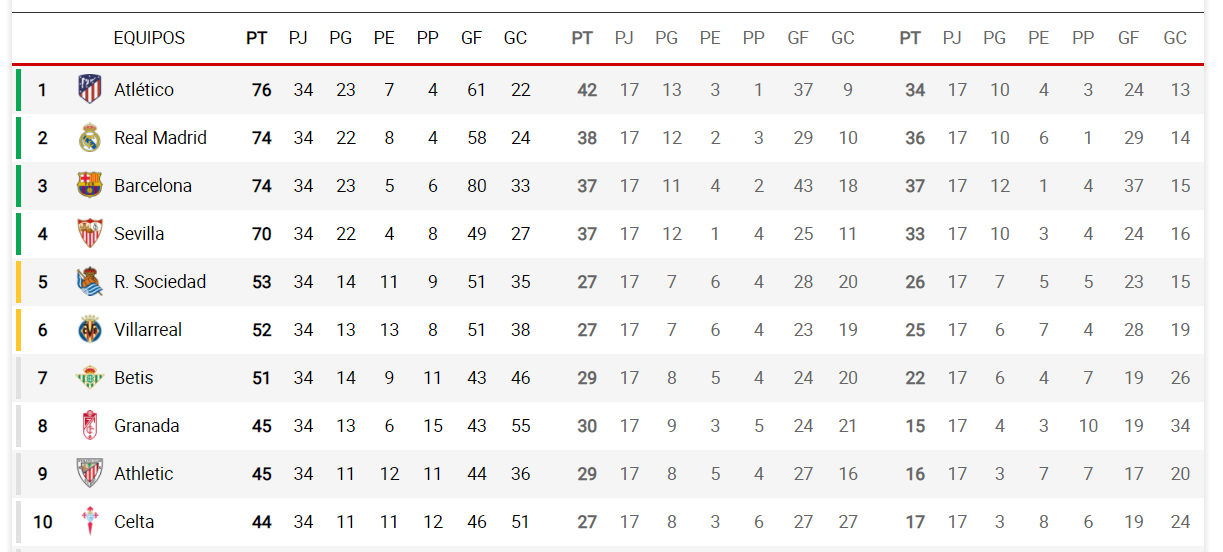

In [3]:
Image.open('image2.PNG')

In [10]:
from scrapy import Selector

In [11]:
url2="https://www.marca.com/futbol/primera-division/clasificacion.html"
html=requests.get(url2).content

In [12]:
sel=Selector(text=html)

La tabla que buscamos tiene id= 'ue-table-ranking'

In [13]:
sel.xpath('//table[@id="ue-table-ranking"]')

[]

La web utiliza javascript para ofrecer la información de la tabla y al usar scrapy en vez de obtener los datos de la misma nos entrega una lista vacía, Vamos a usar Selenium

In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [15]:
#Activamos que Selenium esté controlando Chrome y abrimos la web
#Necesitamos descargarnos previamente el driver del navegador que usamos.
DRIVER_PATH = 'Downloads/chromedriver_win32/chromedriver.exe'
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get(url2)

In [16]:
#El path lo podemos extraer automáticamente al inspeccionar el elemento en el navegador
tabla=driver.find_elements_by_xpath('//*[@id="js_5995827a46163fbd2b8b4591"]/section/div/div/section/div/ul/li[2]/ue-table-ranking')
tabla=tabla[0].text.split('\n')
tabla[3:12]

['1',
 'Atlético',
 '76 34 23 7 4 61 22 42 17 13 3 1 37 9 34 17 10 4 3 24 13',
 '2',
 'Real Madrid',
 '74 34 22 8 4 58 24 38 17 12 2 3 29 10 36 17 10 6 1 29 14',
 '3',
 'Barcelona',
 '74 34 23 5 6 80 33 37 17 11 4 2 43 18 37 17 12 1 4 37 15']

In [17]:
columns=tabla[2].split(' ')
liga=pd.DataFrame(columns=columns)
liga

,EQUIPOS,PT,PJ,PG,PE,PP,GF,GC,PT,PJ,...,PP,GF,GC,PT,PJ,PG,PE,PP,GF,GC


In [18]:
n=20 # equipos en liga
j=0
for i in range(3,len(tabla)-2,3):    
    if j==20: break
    equipo=tabla[i+1]
    puntos=tabla[i+2].split(' ')     
    fila=[equipo,*puntos]
    fila = pd.Series(fila,index=liga.columns)
    liga= liga.append(fila, ignore_index=True)
    j+=1  

In [19]:
liga

,EQUIPOS,PT,PJ,PG,PE,PP,GF,GC,PT,PJ,...,PP,GF,GC,PT,PJ,PG,PE,PP,GF,GC
0,Atlético,76,34,23,7,4,61,22,42,17,...,1,37,9,34,17,10,4,3,24,13
1,Real Madrid,74,34,22,8,4,58,24,38,17,...,3,29,10,36,17,10,6,1,29,14
2,Barcelona,74,34,23,5,6,80,33,37,17,...,2,43,18,37,17,12,1,4,37,15
3,Sevilla,70,34,22,4,8,49,27,37,17,...,4,25,11,33,17,10,3,4,24,16
4,R. Sociedad,56,35,15,11,9,53,35,30,18,...,4,30,20,26,17,7,5,5,23,15
5,Villarreal,52,34,13,13,8,51,38,27,17,...,4,23,19,25,17,6,7,4,28,19
6,Betis,51,34,14,9,11,43,46,29,17,...,4,24,20,22,17,6,4,7,19,26
7,Granada,45,34,13,6,15,43,55,30,17,...,5,24,21,15,17,4,3,10,19,34
8,Athletic,45,34,11,12,11,44,36,29,17,...,4,27,16,16,17,3,7,7,17,20
9,Celta,44,34,11,11,12,46,51,27,17,...,6,27,27,17,17,3,8,6,19,24


In [20]:
#cerrramos la conexión de Selenium
driver.close()

Podemos unir el código anterior en una función y cambiando la url y el path podemos encontrar clasificaciones
de otras ligas europeas en la misma web.

In [21]:
def clasificacion(path,n):    
    tabla=driver.find_elements_by_xpath(path)
    tabla=tabla[0].text.split('\n')
    columns=tabla[2].split(' ')
    cl=pd.DataFrame(columns=columns)
    j=0
    for i in range(3,len(tabla)-2,3):    
        if j==n: break
        equipo=tabla[i+1]
        puntos=tabla[i+2].split(' ')     
        fila=[equipo,*puntos]
        fila = pd.Series(fila,index=cl.columns)
        cl= cl.append(fila, ignore_index=True)
        j+=1
    return cl

In [22]:
#liga inglesa
url='https://www.marca.com/futbol/premier-league/clasificacion.html?intcmp=MENUPROD&s_kw=premier-league-clasificacion'
path='//*[@id="js_594be87de2704e4a598b4571"]/section/div/div/section/div/ul/li/ue-table-ranking'
n=20 #numero de equipos

In [23]:
# Abrimos conexión
driver = webdriver.Chrome(executable_path=DRIVER_PATH)
driver.get(url)

In [24]:
premier=clasificacion(path,n)
premier

,EQUIPOS,PT,PJ,PG,PE,PP,GF,GC,PT,PJ,...,PP,GF,GC,PT,PJ,PG,PE,PP,GF,GC
0,M. City,80,34,25,5,4,71,24,38,17,...,3,37,15,42,17,13,3,1,34,9
1,M. United,67,33,19,10,4,64,35,30,16,...,4,34,21,37,17,10,7,0,30,14
2,Leicester City,63,35,19,6,10,63,43,28,18,...,8,32,26,35,17,10,5,2,31,17
3,Chelsea,61,34,17,10,7,53,31,30,17,...,3,29,16,31,17,9,4,4,24,15
4,West Ham Utd.,58,34,17,7,10,55,44,31,17,...,4,29,21,27,17,8,3,6,26,23
5,Tottenham H.,56,34,16,8,10,60,38,30,17,...,5,32,18,26,17,7,5,5,28,20
6,Liverpool,54,33,15,9,9,55,39,27,17,...,6,25,20,27,16,7,6,3,30,19
7,Everton,52,33,15,7,11,45,42,19,17,...,8,23,27,33,16,10,3,3,22,15
8,Arsenal,49,34,14,7,13,46,37,22,17,...,7,19,20,27,17,8,3,6,27,17
9,Aston Villa,48,33,14,6,13,48,38,21,16,...,7,26,23,27,17,8,3,6,22,15


In [25]:
#cerrramos la conexión de Selenium
driver.close()